# Activity 2: Titanic 
## Machine Learning from Disaster
### _Tip> shortcuts for Jupyter Notebook_
- **Shift + Enter**: run cell and select below

### _Library_
- **Numpy**: Fundamental package for array calculation
- **Matplotlib**: Library for plotting
- **Sklearn**: Library that contains basic classifiers

![Sto%CC%88wer_Titanic.jpg](attachment:Sto%CC%88wer_Titanic.jpg)

In [0]:
# This is the library to use for this project.
# It must be executed before the next cell execution.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

## 1. Data analysis
$\quad$Before applying the Preprocessing and Machine Learning algorithm, it is important to first understand how the given data is organized. The data presented by this Kaggle Project contains the following information.



<br>
![alt text](img\info table.png "Title") 
<br>
<br>
$\quad$Let's take a look at the description and code below to see how the above information is stored in the data and how the data is distributed.
<br>
<br>

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6730cbd30>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa672ff78d0>]]


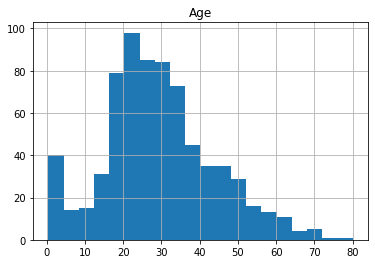

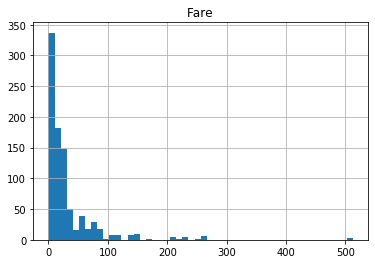

In [2]:
#  Read Data
train_data = pd.read_csv('train.csv');
test_data = pd.read_csv('test.csv');

# Print Histograms of "Age" and "Fare" features
print(train_data[["Age"]].hist(bins=20))
print(train_data[["Fare"]].hist(bins=50))

$\quad$First, it reads the data. The data includes train.csv for training and test.csv for testing. Use the read_csv function of the pandas library to read both data. The imported data is specified as train_data and test_data, respectively.
<br>

$\quad$It is necessary to check how the above information is stored in the read data. Let's run the code below to check out the parts of train.csv and test.csv.

In [3]:
# read first 5 of train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# read last 5 of train_data
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


$\quad$train_data is used for each row to display "PassangerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Embarked" information. Here, 11 pieces of information except for "Survived" correspond to the feature, and "Survived" corresponds to the label. 0 means "dead" and 1 means "survived".
"Pclass" is for ticket class. The lower the number is, the higher the ticket class is. "Cabin" is cabinet number. "Embarked" is boarding port. There were three places to board, S(Southampton), C(Cherbourg) and Q(Queenstown).
<br>
<br>

In [5]:
# read first 5 of test_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# read last 5 of test_data
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


$\quad$If you look at test_data, you will see the following information from each row: "PassangerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" are included. Unlike train_data, there is no "Survived" information corresponding to the label because test_data is data used to verify the model.
<br>
<br>
$\quad$As far as we can see, "PassangerId" is simply a feature that is attached for ordering and it is not necessary data to judge whether passennger is actually alive. And because "Pclass", "Age", "SipSp", "Parch", "Fare" are numeric information, machine learning algorithm can be applied even without preprocessing. However, other information such as "Name", "Sex", "Ticket", "Cabin", "Embarked" need appropriate preprocessing such as removing information and extracting new information before vectorization.
<br>
<br>
<br>


$\quad$Now, look at the distribution of given data, the relationship between survivability ("Survived"), and how to preprocess the data.
<br>
<br>
$\quad$First, let's look at the distribution of the numeric information in the data. Execute the following code to check the distribution.

In [7]:
# Analyze numeric information of train_data
train_data.describe(percentiles=[0.25, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


$\quad$Note that, count(number of data), mean, std(standard deviation), min(minimum) the upper 25%, 50% 75% and max(maximum) are printed.
<br>
<br>
$\quad$For "count", the number of "PassengerId" is 891, so train_data contains a total of 891 people. For "Age", its count is 714, thus "Age" is not known for 177 passengers which implies that there are some missing data. 
<br>
<br>
$\quad$Next is mean. You can see that average value of survival rate is 38.4%, ticket class is 2.3, number of sisters and brothers are 0.52 number of parents are 0.38 and the ticket cost is 32.2.
<br>
<br>
$\quad$The next values ​​are min, max, 25%, 50%, and 75%. These values allow us to understand the overall distribution and to make various interpretations. For example, "SibSp" and "Parch" are 1 or 0 in the top 75%, so most passengers boarded alone without a family. And up to 75% of the "Fare" was 31, but the max is 512, so some customers pay a lot more than other customers. If you want to know the value of the upper 60%, 80%, etc., you can change the value inside the percentile of the above code to 0.75, 0.8.
<br>
<br>
$\quad$The distribution of other information, except for the numeric information, can be seen by running the following code:

In [8]:
# Analyze non-numeric(categorical) information of train_data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mellinger, Miss. Madeleine Violet",male,347082,B96 B98,S
freq,1,577,7,4,644


$\quad$The code above shows the distribution of the non-numeric information "Name", "Sex", "Ticket", "Cabin", "Embarked". The output is "count" (number), "unique" (number of different information), "top" (top information), and "freq" (most frequent).
<br>
<br>
$\quad$For "count", train_data has a total of 891, so most information has 891 values. However, we can confirm that some portions of the information of "Cabin" and "Embarked" are unknown.
<br>
<br>
$\quad$For "Unique", "Name" has the value of 891, so everyone in train_data has a different name. There are two sexes, male and female, so it has a value of 2. Ticket and cabin are 681 and 147, respectively, and there are passengers with the same ticket or cabin number. Finally, since Titanic has three departing ports, so embarked is three.
<br>
<br>
$\quad$"top" is the most common information, and "freq" is the number of that information. Because "Name" is different for each person, freq is 1 and the value of top is not significant. "Sex" is 577 male, so there were 577 men and 314 women passengers. And if you look at "Embarked" you can see that most of the passengers (644) boarded at port "S" (Southampton).
<br>
<br>
<br>
<br>
<br>
<br>
$\quad$Next, we examine how each of feature is related with "Survived".

In [9]:
# Statistics between "Pclass" and "Survived"
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We use "mean" method in above cell. The average value of "survived" means survival rate. Therefore, we can see the survival rate for each categories of feature. 

If we can see there's some correlation between features and survival rate, this feature can be a meaningful information.


First, the relationship between "Pclass" and "Survived". The results show that the higher the ticket rating, the higher the survival rate.

In [10]:
# Statistics between "Sex" and "Survived"
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The survival rate of women is much higher than that of men.

In [11]:
# Statistics between "SibSp" and "Survived"
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


"SibSp" is the number of brothers and sisters. In general, the lower the number of brothers and sisters shows the higher the survival rate.

In [12]:
# Statistics between "Parch" and "Survived"
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


"Parch" is the number of parents and children. The lower the number, as in "SibSp" above, the higher the survival rate.

In [13]:
# Statistics between "Embarked" and "Survived"
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


"Embarked" is the boarding location. The survival rate is much higher than the other areas when the boarding location is "C"(Cherbourg), and is the lowest for "S"(Southampton) where the most people boarded.

$\quad$
"Pclass", "Sex" and "Embarked" are good features that can be directly related to "Survived". Also, you can use "Sex" and "Embarked" for training after vectorization of "Sex" and restoration of some unknown information of "Embarked".
<br>
<br>
$\quad$"SibSp" and "Parch", as we have seen above, tend to have a high survival rate when the number is small, but it is difficult to find a direct association. Therefore,we may apply the following preprocessing: '0' if the number is small (less or equal to 4) and '1' if it is big (more than 4). Since both of them indicate the number of family members, it is desirable to use "FamilySize" which is the sum of the two values ​​rather than using both of them.

## 2. Preprocessing

Read data and define preprocess function

In [0]:
# Read Data
preprocessing_train_data = pd.read_csv('train.csv')
preprocessing_test_data = pd.read_csv('test.csv')
datasets = [preprocessing_train_data, preprocessing_test_data]

# We'll copy original dataset to use in comparison
datasets_original = [dataset.copy() for dataset in datasets]

preprocesses = {}
# preprocess(feature_name: str, f: function, show_head: bool): None
# applies modification for datasets
def preprocess(feature_name, f, show_head=False):
    global datasets

    print("PREPROCESS :: %s" % feature_name)

    if hasattr(f, 'once') and f.once == True:
        # If function has 'once' flag,
        # we'll apply preprocessing to train+test set
        # and after preprocessing, we'll split again into train, test set

        datasets_combined = pd.concat(objs=datasets, axis=0, sort=False)
        retval = f(datasets_combined)

        new_datasets_combined = \
            retval if retval is not None else datasets_combined

        train_len = len(datasets[0])
        datasets = [
            new_datasets_combined[:train_len],
            new_datasets_combined[train_len:]
        ]
    
    else:
        # If function doesn't have 'once' flag,
        # we'll apply preprocessing two times.
        # One for train set, one for test set.
        for index, dataset in enumerate(datasets):
            retval = f(dataset)

            if retval is not None:
                datasets[index] = retval
    
    # Also, we'll keep track what preprocessing has been done
    # to use in comparison
    if feature_name not in preprocesses:
        preprocesses[feature_name] = f

    if show_head:
        return datasets[0].head()


# process_onehot(target_columns: str or list): function
# generates preprocess function
# which encodes certain column(s) to one-hot vector
def process_onehot(target_columns):
    if type(target_columns) == str:
        target_columns = [target_columns]
    
    def preprocess_fn(datasets):
        return pd.get_dummies(
            datasets,
            columns=target_columns
        )
    
    preprocess_fn.once = True
    return preprocess_fn


# process_normalize(target_column: str): function
# generates preprocess function
# which normalizes numbers to [0, 1]
def process_normalize(target_column):
    def preprocess_fn(datasets):
        maximum = datasets[target_column].max()
        minimum = datasets[target_column].min()

        datasets[target_column] = (datasets[target_column] - minimum) / \
            (maximum - minimum)
        
        return datasets
    
    preprocess_fn.once = True
    return preprocess_fn

First, we create a new feature called "FamilySize" by adding "Sibsp" and "Parch".

Then, "SibSp" and "Parch" are combined into one "FamilySize". Let's see how this feature relates to "Survived".

In [15]:
def process_family_size(dataset):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

preprocess('FamilySize', process_family_size, show_head=True)

# Statistics between "FamilySize" and "Survived"
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

PREPROCESS :: FamilySize


,Survived
FamilySize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


To simplify further, we change each value of "FamilySize" to "1" if it is bigger than 4 and "0" if it is smaller than or equal to 4.

**#1 MODIFICATION: Reviving Parch, SibSp**  
We'll define process_sibsp_parch, which maps Parch, SibSp to Protector and Protectee by its age and sex. But this will not be executed immediately: will be executed in `Compare` Section.

If Age is less than 16 or greater than 70, the Parch becomes Protector and SibSp becomes Protectee.

Else if Age is greater than 30, the Parch becoms Protectee. If it is male and has SibSp the Protectee is increased by 1 (Spouse).

Else (16 <= Age <= 30) the Parch becomes Protector but SibSp is just dropped.

In [16]:
def process_simplize_family_size(dataset):
    dataset.loc[dataset['FamilySize'] <= 4, 'FamilySize'] = 0
    dataset.loc[dataset['FamilySize'] > 4, 'FamilySize'] = 1

def process_drop_sibsp_parch(dataset):
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

def process_sibsp_parch(dataset):
    def parse_sibsp_parch(row):
        if row['Age'] < 16 or row['Age'] > 70:
            row['Protector'] = row['Parch']
            row['Protectee'] = row['SibSp']
        
        elif row['Age'] > 30:
            row['Protectee'] = row['Parch']
            if row['Sex'] == 1:
                row['Protectee'] += 1 if row['SibSp'] else 0
            
            row['Protector'] = 0
        
        else:
            row['Protector'] = row['Parch']
            row['Protectee'] = 0
        
        row.drop(['SibSp', 'Parch'], inplace=True)

        return row
    
    return dataset.apply(parse_sibsp_parch, axis=1)

sibsp_parch_comparison = {
    'SibSp Parch': process_sibsp_parch,
    'Normalize Protector': process_normalize('Protector'),
    'Normalize Protectee': process_normalize('Protectee')
}

preprocess('Simplize FamilySize', process_simplize_family_size)
preprocess('SibSp Parch', process_drop_sibsp_parch)

PREPROCESS :: Simplize FamilySize
PREPROCESS :: SibSp Parch


$\quad$"Sex" and "Embarked" are information that directly affects "Survived". Therefore, these two pieces of information do not require any preprocessing; we simply restore the missing parts and run vectorization.
<br>
<br>
$\quad$First, we restore the two lost data of "Embarked". In this preproessing, we would like to designate two "Embakred" information as 'S'(Southampton) port where the most passengers have boarded. Then, we set 'female' of 'Sex' to '0', and '1' to 'male', 'Q'(Queenstown), 'C'(Cherbourg), 'S'(Southampton) of 'Embarked'.
<br>
<br>
**#2 MODIFICATION: Embarked to one-hot**  
To compare between one-hot vs numeric we'll define process_onehot_embarked, which maps 'Q', 'C', 'S', to one-hot vector. But this will not be executed immediately: will be executed in `Compare` Section.

In [17]:
def process_fill_embarked(dataset):
    dataset['Embarked'].replace([None], ['S'], inplace=True)

def process_sex(dataset):
    dataset.replace(['female', 'male'], [0, 1], inplace=True)

def process_numeric_embarked(dataset):
    dataset.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

process_onehot_embarked = process_onehot('Embarked')
embarked_comparison = {
    'Embarked Embedding': process_onehot_embarked
}

preprocess('Fill Embarked', process_fill_embarked)
preprocess('Sex Embedding', process_sex)
preprocess('Embarked Embedding', process_numeric_embarked, show_head=True)

PREPROCESS :: Fill Embarked
PREPROCESS :: Sex Embedding
PREPROCESS :: Embarked Embedding


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,2,0



$\quad$"Name", "Ticket", and "Cabin" cannot be directly related to "Survived". Therefore, we may remove these three features.
<br>
<br>
$\quad$However, if you look at "Name", you find information such as 'Mr', 'Mrs', 'Capt', 'Master' and so on. We extract this information from "Name" and create a new feature "Title". After the extraction, "Name", "Ticket" and "Cabin" features are removed.
<br>
<br>
**#3 MODIFICATION: Parsing Cabin**  
We'll define process_parse_cabin, which parses cabin string and classifies it to decks. But this will not be executed immediately: will be executed in `Compare` Section.

In [18]:
import re

# Extract "Name" and create "Title"
def process_title(dataset):
    dataset['Title'] = dataset.Name.str.extract(
        '([A-Za-z]+)\.', expand=False
    )

    dataset.drop('Name', axis=1, inplace=True)

def process_remove_ticket(dataset):
    dataset.drop('Ticket', axis=1, inplace=True)

def process_remove_cabin(dataset):
    dataset.drop('Cabin', axis=1, inplace=True)

"""
def process_parse_ticket(dataset):
    dataset['TicketPrefix'] = dataset.Ticket.str.extract(
        '([A-Z0-9.\/ ]+? )?\d+', expand=False
    )

    dataset['TicketNumber'] = dataset.Ticket.str.extract(
        '(?:[A-Z0-9.\/ ]+? )?(\d+)', expand=False
    )
"""

def process_parse_cabin(dataset):
    target_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    def parse_cabin(row):
        cabin_split = \
            row['Cabin'].split(' ') \
            if not pd.isna(row['Cabin']) \
            else []
        
        cabin_set = list(set(
            [re.sub('[^A-Z]+', '', cabin) for cabin in cabin_split]
        ))

        for deck in target_decks:
            row['Deck_%s' % deck] = 1 if deck in cabin_set else 0
        
        row.drop('Cabin', inplace=True)

        return row
    
    return dataset.apply(parse_cabin, axis=1)

cabin_comparison = {
    'Cabin': process_parse_cabin
}

preprocess('Title Extraction', process_title)
preprocess('Ticket', process_remove_ticket)
preprocess('Cabin', process_remove_cabin)

# Print CrossTable between "Title" and "Sex" features
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

PREPROCESS :: Title Extraction
PREPROCESS :: Ticket
PREPROCESS :: Cabin


Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


This is crosstable of "Title" and "Sex" features. You can see there are one captain or six doctors in male and one doctor or 182 Miss in female categories.


There are very few passengers with "Title" other than "Master", "Mr", "Mrs", and "Ms". So we replace these rare titles with "Rare" and titles for females such as "MS", "Mlle", and "Mmn" are combined with "Miss". After substitution, we vectorize 'Mr' to '1', 'Miss' to '2', 'Mrs' to '3', 'Master' to '4', 'Rare' to '5' and set '0' if "Title" is unknown. This can be done in the code below.

**#4 MODIFICATION: Title to one-hot**  
We'll define process_onehot_title, which maps title to one-hot vector. But this will not be executed immediately: will be executed in `Compare` Section.

In [19]:
def process_normalize_title(dataset):
    # The rest except the main "Title" is classified as "Rare"
    dataset['Title'].replace([
        'Lady', 'Countess', 'Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir',
        'Jonkheer', 'Dona'
    ], 'Rare', inplace=True)

    # Unify 'Ms', 'Mlle', 'Mme' as 'Miss'
    dataset['Title'].replace(
        ['Ms', 'Mlle', 'Mme'],
        ['Miss', 'Miss', 'Miss'],
        inplace=True
    )

def process_numeric_title(dataset):
    # "Title" vectorization
    dataset['Title'].replace(
        ['Mr', 'Miss', 'Mrs', 'Master', 'Rare'],
        [1, 2, 3, 4, 5],
        inplace=True
    )

    # Set '0' for unknown "Title"
    dataset['Title'].replace([None], [0], inplace=True)

process_onehot_title = process_onehot('Title')
title_comparison = {
    'Title Embedding': process_onehot_title
}

preprocess('Title Normalization', process_normalize_title)
preprocess('Title Embedding', process_numeric_title, show_head=True)


PREPROCESS :: Title Normalization
PREPROCESS :: Title Embedding


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1



$\quad$In case of "Age", there are 177 missing data and we restore them to average value of the age(30) for the rest of the passengers.


In [20]:
def process_fill_age(dataset):
    dataset['Age'].replace([None], [30], inplace=True)

preprocess('Fill Age', process_fill_age, show_head=True)

PREPROCESS :: Fill Age


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


**#5 MODIFICATION: Normalize Age, Fare, Pclass**  
As "Age", "Fare", "Pclass" columns need normalization. We divide it into their average. But this will not be executed immediately: will be executed in `Compare` Section.

In [0]:
process_normalize_age = process_normalize('Age')
process_normalize_fare = process_normalize('Fare')
# process_normalize_pclass = process_normalize('Pclass')

normalize_comparison = {
    'Normalize Age': process_normalize_age,
    'Normalize Fare': process_normalize_fare,
#   'Normalize Pclass': process_normalize_pclass
}

## 3. Compare


### Comparing Preprocessing
$\quad$Now we apply machine learning algorithms to preprocessed data and comparing data. After that we'll compare the roc curve and cross-validated accuracy.
<br>
<br>
$\quad$In this project, we will use 'Logistic Regression', 'SVM', and 'RandomForest' that we reviewed during the previous lectures.
<br>
<br>
$\quad$To use each algorithm, we create training data by removing "Survived" and meaningless "PassangerId" from preprocessed data, and extract only "Survived" to create label data. (remove "PassagerId" from the test data), apply each algorithm, predict the test data with the resulting model, save it as a file, and submit it to kaggle. The code is shown below.

In [22]:
# cross_validation(classifier, train_set: DataFrame, chunks: int)
#    : array
#
# 1. Splits dataset into 8 chunks
# 2. For each classifier, chunk:
#    use 1 chunk to validate, other chunks to train
# 3. Returns 

def cross_validation(classifier, train_set, chunks=8):
    train_X = train_set.drop(
            ['Survived', 'PassengerId'], axis=1
        ).to_numpy()

    train_Y = train_set['Survived'].to_numpy()

    """
    chunk_size = int(train_set.shape[0] / chunks)
    window = []

    for classifier in classifiers:
        for i in range(chunks):
            train_chunks = np.r_[
                train_set[: i * chunk_size],
                train_set[(i + 1) * chunk_size :]
            ]

            validation_chunks = train_set[
                i * chunk_size : (i + 1) * chunk_size
            ]
            
            classifier.fit(train_chunks, validation_chunks)
            pred_Y = classifier.predict_proba(train_X)[:, 1]

            # Scores the classifier
            accuracy = classifier.score(X)
            fpr, tpr, threshold = roc_curve(train_Y, pred_Y)
            window.append({'fpr': fpr, 'tpr': tpr, 'accuracy': accuracy})
    """

    return cross_val_score(classifier, train_X, train_Y, cv=8)

# apply_comparison_preprocess(
#    comparison_object: {feature_name: function}, show_head: bool
# ) : datasets
#
# CompareObject replaces processing step
#   which name is feature_name to comparing function
#
# It applies the preprocessing steps to original dataset
def apply_comparison_preprocess(comparison_object, show_head=True):
    global datasets, preprocesses
    
    originally_preprocessed_datasets = datasets
    original_preprocesses = preprocesses.copy()

    comparing_datasets = [dataset.copy() for dataset in datasets_original]
    comparing_preprocess = preprocesses.copy()

    # Apply CompareObject to Original Preprocess Steps
    for (key, value) in comparison_object.items():
        comparing_preprocess[key] = value
    
    # Apply Preprocess Steps to comparing_datasets
    datasets = comparing_datasets

    for (key, process_fn) in comparing_preprocess.items():
        retval = preprocess(
            key, process_fn, show_head=(show_head and key in comparison_object)
        )
        if retval is not None:
            print(retval)

    comparing_datasets = datasets
    datasets = originally_preprocessed_datasets
    preprocesses = original_preprocesses

    return comparing_datasets

# compare(comparison_object: {feature_name: function}, classifier)
#    : {"original": array, "target": array}
# 
# It returns cross_validation scores of
#    originally preprocessed dataset and
#    dataset which some steps of preprocessing is replaced
def compare_preprocessing(
    comparison_object, classifier=SVC(probability=True, gamma='auto')
):
    preprocessed_datasets = datasets
    comparing_datasets = apply_comparison_preprocess(comparison_object)

    return {
        'original': cross_validation(classifier, preprocessed_datasets[0]),
        'applied': cross_validation(classifier, comparing_datasets[0])
    }


# print_compare_result(compare_name: str, compare_result: {name: array})
# prints cross validation score for each feature
def print_compare_result(compare_name, compare_result):
    for key, value in compare_result.items():
        print("%s Accuracy: %.4f (+/- %.4f)" % (
            key.capitalize(), value.mean(), value.std() * 2
        ))

    print("\n")


def print_compare_preprocessing(compare_name, comparison_object):
    print("======= %s =======" % compare_name)
    print_compare_result(
        compare_name, compare_preprocessing(comparison_object)
    )

print_compare_preprocessing('Modification #1: SibSp Parch', sibsp_parch_comparison)
print_compare_preprocessing('Modification #2: Embarked', embarked_comparison)
print_compare_preprocessing('Modification #3: Cabin', cabin_comparison)
print_compare_preprocessing('Modification #4: Title', title_comparison)
print_compare_preprocessing('Modification #5: Normalize', normalize_comparison)

======= Modification #1: SibSp Parch =======
PREPROCESS :: FamilySize
PREPROCESS :: Simplize FamilySize
PREPROCESS :: SibSp Parch
    Age Cabin Embarked  ...     Sex  Survived            Ticket
0  22.0   NaN        S  ...    male         0         A/5 21171
1  38.0   C85        C  ...  female         1          PC 17599
2  26.0   NaN        S  ...  female         1  STON/O2. 3101282
3  35.0  C123        S  ...  female         1            113803
4  35.0   NaN        S  ...    male         0            373450

[5 rows x 13 columns]
PREPROCESS :: Fill Embarked
PREPROCESS :: Sex Embedding
PREPROCESS :: Embarked Embedding
PREPROCESS :: Title Extraction
PREPROCESS :: Ticket
PREPROCESS :: Cabin
PREPROCESS :: Title Normalization
PREPROCESS :: Title Embedding
PREPROCESS :: Fill Age
PREPROCESS :: Normalize Protector
    Age  Embarked  FamilySize     Fare  ...  Protector  Sex  Survived  Title
0  22.0         2           0   7.2500  ...        0.0    1       0.0      1
1  38.0         1          

Modify dataset by applying modification #2, #3, #4, #5

In [23]:
datasets = apply_comparison_preprocess(
    dict(
        **sibsp_parch_comparison,
        **embarked_comparison,
        **title_comparison,
        **cabin_comparison,
        **normalize_comparison
    ),

    show_head=False
)
datasets[0].head()

PREPROCESS :: FamilySize
PREPROCESS :: Simplize FamilySize
PREPROCESS :: SibSp Parch
PREPROCESS :: Fill Embarked
PREPROCESS :: Sex Embedding
PREPROCESS :: Embarked Embedding
PREPROCESS :: Title Extraction
PREPROCESS :: Ticket
PREPROCESS :: Cabin
PREPROCESS :: Title Normalization
PREPROCESS :: Title Embedding
PREPROCESS :: Fill Age
PREPROCESS :: Normalize Protector
PREPROCESS :: Normalize Protectee
PREPROCESS :: Normalize Age
PREPROCESS :: Normalize Fare


,Age,FamilySize,Fare,PassengerId,Pclass,Protectee,Protector,Sex,Survived,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.273456,0,0.014151,1,3,0.0,0.0,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.473882,0,0.139136,2,1,0.0,0.0,0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.323563,0,0.015469,3,3,0.0,0.0,0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.436302,0,0.103644,4,1,0.0,0.0,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0.436302,0,0.015713,5,3,0.0,0.0,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Comparing Hyperparameters

In [0]:
# compare_hyperparameter(name1: str, classifier1: Classifier, name2: str, ...)
# get cross validation score for each classifier and return
def compare_hyperparameter(*args):
    cross_validation_dict = {}

    for i in range(0, len(args), 2):
        cross_validation_dict[args[i]] = cross_validation(
            args[i + 1], datasets[0]
        )
    
    return cross_validation_dict


def print_compare_hyperparameter(compare_name, *args):
    print("======= %s =======" % compare_name)
    print_compare_result(
        compare_name, compare_hyperparameter(*args)
    )


#### SVC

* Kernel

We'll test it for rbf, polynomial(degree 2, 3, 4) and sigmoid

In [25]:
print_compare_hyperparameter("Kernel",
    "rbf", SVC(probability=True, gamma='auto'),
    "polynomial2", SVC(probability=True, gamma='auto', kernel='poly', degree=2),
    "polynomial3", SVC(probability=True, gamma='auto', kernel='poly', degree=3),
    "polynomial4", SVC(probability=True, gamma='auto', kernel='poly', degree=4),
    "sigmoid", SVC(probability=True, gamma='auto', kernel='sigmoid')
)


======= Kernel =======
Rbf Accuracy: 0.8194 (+/- 0.0454)
Polynomial2 Accuracy: 0.8047 (+/- 0.0336)
Polynomial3 Accuracy: 0.7566 (+/- 0.0536)
Polynomial4 Accuracy: 0.6679 (+/- 0.0625)
Sigmoid Accuracy: 0.7934 (+/- 0.0489)




* C Value  
We'll test it for 0.1, 0.5, 1.0, 2.0, 5.0

In [26]:
print_compare_hyperparameter("C Value",
    "0.1", SVC(probability=True, gamma='auto', C=0.1),
    "0.5", SVC(probability=True, gamma='auto', C=0.5),
    "1.0", SVC(probability=True, gamma='auto', C=1.0),
    "2.0", SVC(probability=True, gamma='auto', C=2.0),
    "5.0", SVC(probability=True, gamma='auto', C=5.0),
)


======= C Value =======
0.1 Accuracy: 0.7889 (+/- 0.0468)
0.5 Accuracy: 0.8069 (+/- 0.0305)
1.0 Accuracy: 0.8194 (+/- 0.0454)
2.0 Accuracy: 0.8194 (+/- 0.0454)
5.0 Accuracy: 0.8171 (+/- 0.0499)




* Gamma  
We'll test if for 0.025, $\frac{1}{20} = 0.05$, 0.1, 0.2

In [27]:
print_compare_hyperparameter("Gamma",
    "0.025", SVC(probability=True, gamma=0.025, C=2.0),
    "0.05", SVC(probability=True, gamma=0.05, C=2.0),
    "0.1", SVC(probability=True, gamma=0.1, C=2.0),
    "0.2", SVC(probability=True, gamma=0.2, C=2.0)
)


======= Gamma =======
0.025 Accuracy: 0.8182 (+/- 0.0484)
0.05 Accuracy: 0.8194 (+/- 0.0454)
0.1 Accuracy: 0.8172 (+/- 0.0641)
0.2 Accuracy: 0.8249 (+/- 0.0689)




#### Random Forest

* N_estimators  
We'll test it for 16, 32, 64, 128

In [28]:
print_compare_hyperparameter("N_estimators",
    "16", RandomForestClassifier(n_estimators=16),
    "32", RandomForestClassifier(n_estimators=32),
    "64", RandomForestClassifier(n_estimators=64),
    "128",RandomForestClassifier(n_estimators=128)
)


======= N_estimators =======
16 Accuracy: 0.8104 (+/- 0.0613)
32 Accuracy: 0.7891 (+/- 0.0827)
64 Accuracy: 0.8014 (+/- 0.0569)
128 Accuracy: 0.7958 (+/- 0.0588)




* max_depth  
We'll test it for 2, 4, 8, 16

In [29]:
print_compare_hyperparameter("max_depth",
    "2", RandomForestClassifier(n_estimators=64, max_depth=2),
    "4", RandomForestClassifier(n_estimators=64, max_depth=4),
    "8", RandomForestClassifier(n_estimators=64, max_depth=8),
    "16", RandomForestClassifier(n_estimators=64, max_depth=16)
)


======= max_depth =======
2 Accuracy: 0.7990 (+/- 0.0361)
4 Accuracy: 0.8170 (+/- 0.0427)
8 Accuracy: 0.8316 (+/- 0.0595)
16 Accuracy: 0.8148 (+/- 0.0494)




* min_samples_split  
We'll test it for frac values: 0.01, 0.05, 0.1, 0.5 and default value: 2

In [30]:
print_compare_hyperparameter("min_samples_split",
    "default", RandomForestClassifier(n_estimators=64, max_depth=8),
    "0.01", RandomForestClassifier(n_estimators=64, max_depth=8, min_samples_split=0.01),
    "0.05", RandomForestClassifier(n_estimators=64, max_depth=8, min_samples_split=0.05),
    "0.1", RandomForestClassifier(n_estimators=64, max_depth=8, min_samples_split=0.1),
    "0.5", RandomForestClassifier(n_estimators=64, max_depth=8, min_samples_split=0.5)
)


======= min_samples_split =======
Default Accuracy: 0.8350 (+/- 0.0659)
0.01 Accuracy: 0.8306 (+/- 0.0752)
0.05 Accuracy: 0.8283 (+/- 0.0663)
0.1 Accuracy: 0.8160 (+/- 0.0384)
0.5 Accuracy: 0.7867 (+/- 0.0432)




## Uploading to Kaggle

In [0]:
def predict_testset(name, classifier):
    train_X = datasets[0].drop(
            ['PassengerId', 'Survived'], axis = 1
        ).to_numpy()
    
    train_Y = datasets[0]['Survived'].to_numpy()

    test_X = datasets[1].drop(
            ['PassengerId', 'Survived'], axis=1
        ).to_numpy()

    test_Id = datasets[1]['PassengerId'].to_numpy()

    classifier.fit(train_X, train_Y)

    predict = classifier.predict(test_X)
    predict = np.round(predict).astype(int)

    # Create kaggle submission file
    submission = pd.DataFrame({'PassengerId': test_Id, 'Survived': predict})
    submission.to_csv('submission_%s.csv' % name, index=False)

predict_testset("svm", SVC(probability=True, gamma=0.2, C=2.0))
predict_testset(
    "randomforest",
    RandomForestClassifier(n_estimators=64, max_depth=8, min_samples_split=0.01)
)